# Visualization

## 1. Imports and config

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.config import DATA_FILES, FIGURES_DIR

%load_ext autoreload
%autoreload 2

sns.set_theme(style="whitegrid")

train_df = pd.read_csv(DATA_FILES["train_processed"])

## 2. Load preprocessed data

In [2]:
train_df = pd.read_csv(DATA_FILES["train_processed"])

## 3. Class balance

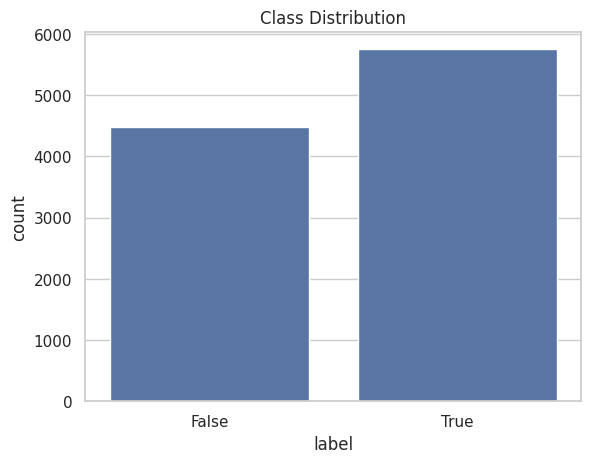

In [3]:
sns.countplot(x="label", data=train_df)
plt.title("Class Distribution")
plt.savefig(FIGURES_DIR / "class_distribution.png")
plt.show()


## 4. Text lenght distribution

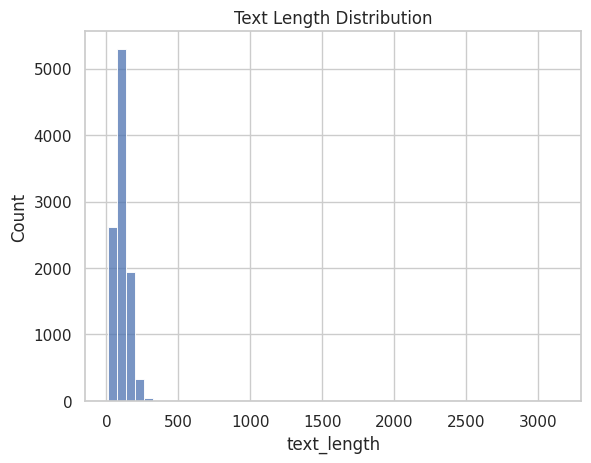

✅ Visualizations saved to reports/figures


In [4]:
train_df["text_length"] = train_df["cleaned_text"].astype(str).apply(len)
sns.histplot(train_df["text_length"], bins=50)
plt.title("Text Length Distribution")
plt.savefig(FIGURES_DIR / "text_length_distribution.png")
plt.show()

print("✅ Visualizations saved to reports/figures")